In [1]:
from pandas import read_csv
import pandas as pd
import numpy 
from matplotlib import pyplot
from sklearn import preprocessing as pre
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
import time
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import statsmodels.api as sm
from sklearn import metrics
import random
import csv

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
series = pd.read_csv('output3rdformat.csv')
X = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Fuel Oil Consumption(Predicted)',
       'Cooling Degree Days U.S. Average', 'Heating Degree Days U.S. Average ',
       'Fuel Oil Consumption(Actual)'],
      dtype='object')
     Month  Fuel Oil Consumption(Predicted)  Cooling Degree Days U.S. Average  \
0        1                         0.894624                          0.003067   
1        2                         1.049869                          0.009975   
2        3                         0.640267                          0.012469   
3        4                         0.428591                          0.064838   
4        5                         0.396877                          0.064838   
5        6                         0.297866                          0.329177   
6        7                         0.400244                          0.496259   
7        8                         0.373951                          0.725686   
8        9                         0.449943                          0.610973 

In [3]:
series = series.astype('float32')
series

,Month,Fuel Oil Consumption(Predicted),Cooling Degree Days U.S. Average,Heating Degree Days U.S. Average,Fuel Oil Consumption(Actual)
0,1.0,0.894624,0.003067,0.795156,0.97
1,2.0,1.049869,0.009975,2.406484,0.84
2,3.0,0.640267,0.012469,1.902743,0.63
3,4.0,0.428591,0.064838,1.234414,0.49
4,5.0,0.396877,0.064838,0.770574,0.35
5,6.0,0.297866,0.329177,0.284289,0.34
6,7.0,0.400244,0.496259,0.094763,0.32
7,8.0,0.373951,0.725686,0.014963,0.36
8,9.0,0.449943,0.610973,0.047382,0.39
9,10.0,0.459995,0.418953,0.124688,0.46


In [4]:
y1= series['Fuel Oil Consumption(Actual)']
X1= series.drop('Fuel Oil Consumption(Actual)',axis = 1)

In [5]:
y1=numpy.array(y1)

In [6]:
y1

array([0.97, 0.84, 0.63, 0.49, 0.35, 0.34, 0.32, 0.36, 0.39, 0.46, 0.55,
       0.73, 0.79, 0.75, 0.65, 0.42, 0.38, 0.35, 0.3 , 0.37, 0.38, 0.41,
       0.54, 0.73, 0.7 , 0.75, 0.65, 0.39, 0.32, 0.28, 0.26, 0.3 , 0.3 ,
       0.37, 0.44, 0.49, 0.74, 0.92, 0.66, 0.47, 0.32, 0.25, 0.22, 0.24,
       0.23, 0.29, 0.46, 0.63, 0.75, 0.73, 0.55, 0.35, 0.23, 0.2 , 0.19,
       0.21, 0.25, 0.36, 0.45, 0.7 , 0.85, 0.7 , 0.54, 0.33, 0.2 , 0.17,
       0.15, 0.14, 0.21, 0.31, 0.34, 0.61, 0.74, 0.71, 0.4 , 0.21, 0.16,
       0.14, 0.11, 0.13, 0.17, 0.26, 0.38, 0.68, 0.76, 0.68, 0.46, 0.26,
       0.13, 0.11, 0.1 , 0.12, 0.18, 0.25, 0.39, 0.49, 0.61, 0.51, 0.32,
       0.19, 0.14, 0.1 , 0.09, 0.11, 0.13, 0.22, 0.39, 0.48, 0.66, 0.61,
       0.44, 0.27, 0.14, 0.1 , 0.1 , 0.11, 0.15, 0.24, 0.39, 0.58, 0.74,
       0.67, 0.51, 0.25, 0.13, 0.1 , 0.11, 0.12, 0.19, 0.26, 0.44, 0.57,
       0.71, 0.83, 0.49, 0.27, 0.15, 0.1 , 0.1 , 0.12, 0.18, 0.29, 0.35,
       0.45, 0.63, 0.62, 0.38, 0.26, 0.16, 0.1 , 0.

In [7]:
X1=numpy.array(X1)

In [8]:
X1

array([[1.00000000e+00, 8.94623816e-01, 3.06747993e-03, 7.95156419e-01],
       [2.00000000e+00, 1.04986930e+00, 9.97506268e-03, 2.40648389e+00],
       [3.00000000e+00, 6.40267193e-01, 1.24688279e-02, 1.90274310e+00],
       [4.00000000e+00, 4.28591460e-01, 6.48379028e-02, 1.23441398e+00],
       [5.00000000e+00, 3.96877050e-01, 6.48379028e-02, 7.70573556e-01],
       [6.00000000e+00, 2.97865659e-01, 3.29177052e-01, 2.84289271e-01],
       [7.00000000e+00, 4.00243998e-01, 4.96259362e-01, 9.47630927e-02],
       [8.00000000e+00, 3.73950690e-01, 7.25685775e-01, 1.49625931e-02],
       [9.00000000e+00, 4.49942917e-01, 6.10972583e-01, 4.73815463e-02],
       [1.00000000e+01, 4.59994525e-01, 4.18952614e-01, 1.24688283e-01],
       [1.10000000e+01, 5.41709185e-01, 1.62094757e-01, 6.40897751e-01],
       [1.20000000e+01, 6.21663451e-01, 3.99002507e-02, 1.23192024e+00],
       [1.00000000e+00, 8.16851974e-01, 7.48129701e-03, 1.99251866e+00],
       [2.00000000e+00, 7.61904120e-01, 1.99501254e

In [9]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
y1 = scaler.fit_transform(y1.reshape(-1,1))
print(y1)
print(len(y1))
X1=scaler.fit_transform(X1)
print(X1)
#series

[[1.        ]
 [0.85393256]
 [0.6179775 ]
 [0.46067417]
 [0.30337077]
 [0.29213482]
 [0.26966292]
 [0.31460673]
 [0.34831458]
 [0.4269663 ]
 [0.5280899 ]
 [0.7303371 ]
 [0.79775286]
 [0.752809  ]
 [0.6404494 ]
 [0.38202244]
 [0.33707863]
 [0.30337077]
 [0.24719103]
 [0.32584268]
 [0.33707863]
 [0.3707865 ]
 [0.516854  ]
 [0.7303371 ]
 [0.6966292 ]
 [0.752809  ]
 [0.6404494 ]
 [0.34831458]
 [0.26966292]
 [0.22471909]
 [0.20224719]
 [0.24719103]
 [0.24719103]
 [0.32584268]
 [0.40449435]
 [0.46067417]
 [0.74157304]
 [0.94382024]
 [0.6516854 ]
 [0.43820226]
 [0.26966292]
 [0.19101124]
 [0.15730336]
 [0.17977528]
 [0.16853933]
 [0.23595504]
 [0.4269663 ]
 [0.6179775 ]
 [0.752809  ]
 [0.7303371 ]
 [0.5280899 ]
 [0.30337077]
 [0.16853933]
 [0.13483146]
 [0.12359551]
 [0.14606741]
 [0.19101124]
 [0.31460673]
 [0.41573036]
 [0.6966292 ]
 [0.8651686 ]
 [0.6966292 ]
 [0.516854  ]
 [0.28089887]
 [0.13483146]
 [0.1011236 ]
 [0.0786517 ]
 [0.06741573]
 [0.14606741]
 [0.25842696]
 [0.29213482]
 [0.59

In [10]:
y1

array([[1.        ],
       [0.85393256],
       [0.6179775 ],
       [0.46067417],
       [0.30337077],
       [0.29213482],
       [0.26966292],
       [0.31460673],
       [0.34831458],
       [0.4269663 ],
       [0.5280899 ],
       [0.7303371 ],
       [0.79775286],
       [0.752809  ],
       [0.6404494 ],
       [0.38202244],
       [0.33707863],
       [0.30337077],
       [0.24719103],
       [0.32584268],
       [0.33707863],
       [0.3707865 ],
       [0.516854  ],
       [0.7303371 ],
       [0.6966292 ],
       [0.752809  ],
       [0.6404494 ],
       [0.34831458],
       [0.26966292],
       [0.22471909],
       [0.20224719],
       [0.24719103],
       [0.24719103],
       [0.32584268],
       [0.40449435],
       [0.46067417],
       [0.74157304],
       [0.94382024],
       [0.6516854 ],
       [0.43820226],
       [0.26966292],
       [0.19101124],
       [0.15730336],
       [0.17977528],
       [0.16853933],
       [0.23595504],
       [0.4269663 ],
       [0.617

In [11]:
X1
print(len(X1))

168


In [12]:
X_train = X1[0:157,:]
X_test = X1[156:168,:]
print(X_train.shape)
print(X_test.shape)

(157, 4)
(12, 4)


In [13]:
y_train = y1[:157]
y_test = y1[156:168]
print(y_train.shape)
print(y_test.shape)

(157, 1)
(12, 1)


In [14]:
X_train=numpy.array(X_train)
y_train=numpy.array(y_train)
X_test=numpy.array(X_test)
y_test=numpy.array(y_test)

In [15]:
X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# reshape input to be 3D [samples, timesteps, features]
#X_train= X_train.reshape((X_train.shape[0], X_train.shape[1]),1)
#X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]),1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(157, 4, 1) (157, 1) (12, 4, 1) (12, 1)


In [16]:
X_train.shape[2]

1

In [17]:
 model = Sequential()
#model.add(LSTM(32, input_shape=(look_back, 1)))
model.add(LSTM(32, input_shape=(4, 1)))
#model.add(Dropout(0.3))
model.add(Dense(1))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
print('compilation time : ', time.time() - start)
model.fit(X_train, y_train, epochs=300, batch_size=1, verbose=2)
    # design network
#model = Sequential()
#model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

compilation time :  0.03159213066101074
Epoch 1/300
 - 1s - loss: 0.0686 - acc: 0.0064
Epoch 2/300
 - 1s - loss: 0.0506 - acc: 0.0064
Epoch 3/300
 - 1s - loss: 0.0439 - acc: 0.0064
Epoch 4/300
 - 1s - loss: 0.0326 - acc: 0.0064
Epoch 5/300
 - 1s - loss: 0.0214 - acc: 0.0064
Epoch 6/300
 - 1s - loss: 0.0208 - acc: 0.0064
Epoch 7/300
 - 1s - loss: 0.0187 - acc: 0.0064
Epoch 8/300
 - 1s - loss: 0.0167 - acc: 0.0064
Epoch 9/300
 - 1s - loss: 0.0177 - acc: 0.0064
Epoch 10/300
 - 1s - loss: 0.0155 - acc: 0.0064
Epoch 11/300
 - 1s - loss: 0.0145 - acc: 0.0064
Epoch 12/300
 - 1s - loss: 0.0146 - acc: 0.0064
Epoch 13/300
 - 1s - loss: 0.0146 - acc: 0.0064
Epoch 14/300
 - 1s - loss: 0.0136 - acc: 0.0064
Epoch 15/300
 - 1s - loss: 0.0144 - acc: 0.0064
Epoch 16/300
 - 1s - loss: 0.0122 - acc: 0.0064
Epoch 17/300
 - 1s - loss: 0.0119 - acc: 0.0064
Epoch 18/300
 - 1s - loss: 0.0132 - acc: 0.0064
Epoch 19/300
 - 1s - loss: 0.0118 - acc: 0.0127
Epoch 20/300
 - 1s - loss: 0.0120 - acc: 0.0064
Epoch 21/

Epoch 170/300
 - 1s - loss: 0.0041 - acc: 0.0127
Epoch 171/300
 - 1s - loss: 0.0042 - acc: 0.0127
Epoch 172/300
 - 1s - loss: 0.0044 - acc: 0.0127
Epoch 173/300
 - 1s - loss: 0.0043 - acc: 0.0127
Epoch 174/300
 - 1s - loss: 0.0047 - acc: 0.0127
Epoch 175/300
 - 1s - loss: 0.0044 - acc: 0.0127
Epoch 176/300
 - 1s - loss: 0.0043 - acc: 0.0127
Epoch 177/300
 - 1s - loss: 0.0041 - acc: 0.0127
Epoch 178/300
 - 1s - loss: 0.0046 - acc: 0.0127
Epoch 179/300
 - 1s - loss: 0.0044 - acc: 0.0127
Epoch 180/300
 - 1s - loss: 0.0045 - acc: 0.0127
Epoch 181/300
 - 1s - loss: 0.0044 - acc: 0.0127
Epoch 182/300
 - 1s - loss: 0.0044 - acc: 0.0127
Epoch 183/300
 - 1s - loss: 0.0045 - acc: 0.0127
Epoch 184/300
 - 1s - loss: 0.0045 - acc: 0.0127
Epoch 185/300
 - 1s - loss: 0.0043 - acc: 0.0127
Epoch 186/300
 - 1s - loss: 0.0045 - acc: 0.0127
Epoch 187/300
 - 1s - loss: 0.0045 - acc: 0.0127
Epoch 188/300
 - 1s - loss: 0.0041 - acc: 0.0127
Epoch 189/300
 - 1s - loss: 0.0044 - acc: 0.0127
Epoch 190/300
 - 1s 

In [18]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [19]:
print(trainPredict.shape,testPredict.shape)

(157, 1) (12, 1)


In [20]:
testPredict.shape[1]

1

In [21]:
#create empty table with 4 fields
#trainPredict_dataset_like=numpy.zeros(shape=(len(trainPredict),4))
#print(trainPredict_dataset_like)
#put the predicted values in the  right field
#trainPredict_dataset_like[:,0]=trainPredict[:,0]
#trainPredict_dataset_like[:,0]=trainPredict[:,0]
#print(trainPredict_dataset_like)
#inverse transform and select the right field
#trainPredict=scaler.inverse_transform(trainPredict_dataset_like)[:,0]
#print(trainPredict)
#trainPredict=scaler.inverse_transform(trainPredict_dataset_like)[:,0:4]
#y_train_dataset_like=numpy.zeros(shape=(len(y_train),4))
#y_train_dataset_like[:,0]=y_train[:,0]
#y_train=scaler.inverse_transform(y_train_dataset_like)[:,0]

In [22]:
#create empty table with 4 fields
#y_train_dataset_like=numpy.zeros(shape=(len(y_train),4))
#print(y_train_dataset_like)
#put the predicted values in the  right field
#trainPredict_dataset_like[:,0]=trainPredict[:,0]
#y_train_dataset_like[:,0]=y_train[:,0]
#print(y_train_dataset_like)
#inverse transform and select the right field
#y_train=scaler.inverse_transform(y_train_dataset_like)[:,0]
#print(y_train)
#print(len(y_train))

In [23]:
#create empty table with 4 fields
#testPredict_dataset_like=numpy.zeros(shape=(len(testPredict),4))
#print(testPredict_dataset_like)
#testPredict_dataset_like[:,0]=testPredict[:,0]
#print(testPredict_dataset_like)
#inverse transform and select the right field
#testPredict=scaler.inverse_transform(testPredict_dataset_like)[:,0]
#print(testPredict)

In [24]:
#create empty table with 4 fields
#y_test_dataset_like=numpy.zeros(shape=(len(y_test),4))
#print(y_test_dataset_like)
#y_test_dataset_like[:,0]=y_test[:,0]
#print(y_test_dataset_like)
#inverse transform and select the right field
#y_test=scaler.inverse_transform(y_test_dataset_like)[:,0]
#print(y_test)

In [25]:
trainScore = mean_squared_error(y_train,trainPredict)
#trainScore = model.evaluate(X_train,y_train,verbose=0)
#print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))
#testScore = model.evaluate(X_test, y_test, verbose=0)
#print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

print('Train Score: %.4f MSE' % (trainScore))
testScore = mean_squared_error(y_test,testPredict)
print('Test Score: %.4f MSE' % (testScore))

Train Score: 0.0037 MSE
Test Score: 0.0054 MSE


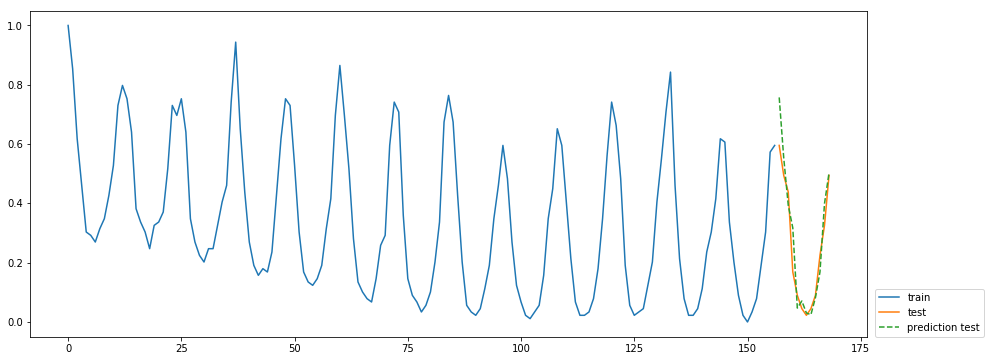

In [54]:
n_train=157
# shift train predictions for plotting
#trainPredictPlot = numpy.empty_like(series)
#trainPredictPlot[:, :] = numpy.nan
#trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
# shift test predictions for plotting
#testPredictPlot = numpy.empty_like(series)
#testPredictPlot[:, :] = numpy.nan
#testPredictPlot[len(trainPredict)-1:len(series)-1+3, :1] = testPredict
# plot baseline and predictions
#pyplot.plot(scaler.inverse_transform(series))
#pyplot.plot(trainPredictPlot,label='Prediction train')
#pyplot.plot(testPredictPlot,'--',label='Prediction test')
pyplot.plot(range(n_train), y_train, label="train")
pyplot.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
#pyplot.plot(range(n_train1), y_pred_train1, '--', label="prediction train")
pyplot.plot(range(n_train, len(y_test) + n_train), testPredict, '--',label="prediction test")
pyplot.legend(loc=(1.01, 0))
pyplot.show()

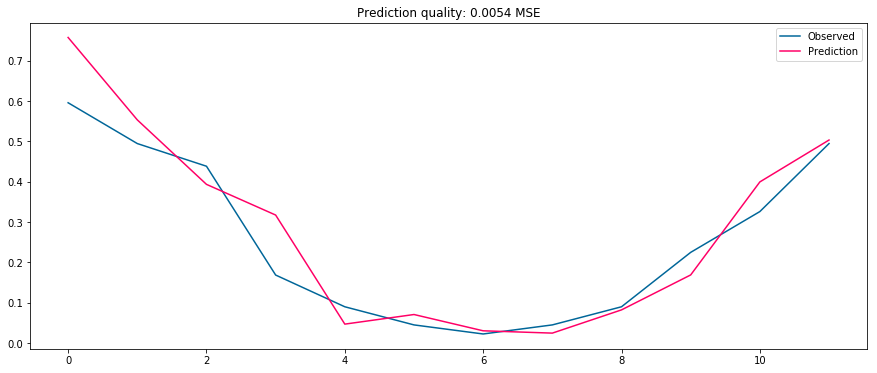

In [26]:
pyplot.title('Prediction quality: {:.4f} MSE'.format(testScore))
pyplot.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
pyplot.plot(testPredict.reshape(-1, 1), label='Prediction', color='#ff0066')
pyplot.legend(loc='best');
pyplot.show()